In [49]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, confusion_matrix, recall_score, roc_curve, auc,precision_score
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv('samples_cancer.csv')

In [51]:
data = data.drop("ID", axis=1)


In [52]:
data["BareNuc"] = pd.to_numeric(data["BareNuc"], errors="coerce")


In [53]:
data = data.dropna()


In [54]:
data["Class"]= data["Class"].map({2:0, 4:1})

In [55]:
data.head()


,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [56]:
x = data.drop("Class", axis=1)
y = data["Class"]

In [57]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

In [59]:
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

In [60]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1-Score",  f1_score(y_test, y_pred))
print("Jaccard", jaccard_score(y_test, y_pred))
print("Error Rate", 1 - accuracy_score(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))



Accuracy 0.39416058394160586
Precision 0.0
Recall 0.0
F1-Score 0.0
Jaccard 0.0
Error Rate 0.6058394160583942
Confusion Matrix [[54 25]
 [58  0]]


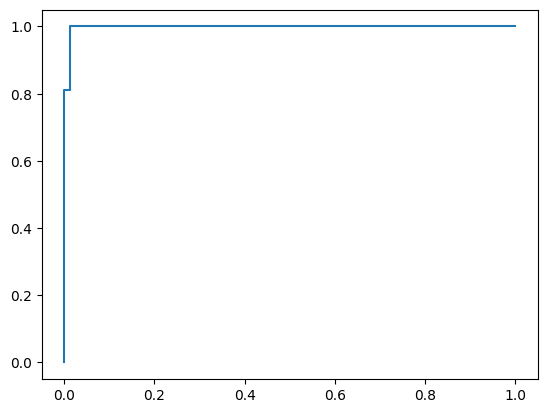

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

/tmp/ipython-input-2285602209.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


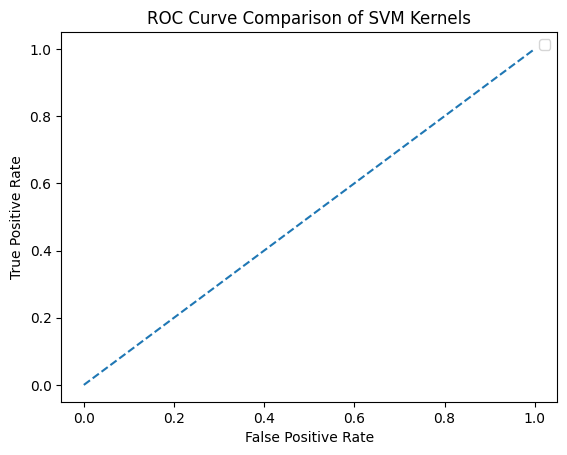

In [62]:
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of SVM Kernels")
plt.legend()
plt.show()